In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_selection import SelectKBest, f_regression, f_classif

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [8]:
merged_raw = pd.read_csv(path+'data/merged.csv')
processed_raw = pd.read_csv(path+'data/processed.csv')

In [9]:
merged = merged_raw[merged_raw.season < 2022]
merged.podium = merged.podium.map(lambda x: 1 if x == 1 else 0)
merged = pd.get_dummies(merged, columns=['driver', 'constructor', 'circuit_id', 'country', 'nationality', 'stage']).drop(['date_of_birth', 'lat', 'long', 'date', 'season', 'round'], axis=1)

In [10]:
processed = processed_raw[processed_raw.season < 2022]
processed.podium = processed.podium.map(lambda x: 1 if x == 1 else 0)

processed = pd.get_dummies(processed, columns=['driver', 'constructor', 'circuit_id', 'stage'])

In [11]:
processed.columns

Index(['season', 'round', 'podium', 'qualifying_pos', 'q_delta',
       'starting_grid', 'driver_wins_before', 'driver_points_before',
       'driver_standings_before', 'constructor_wins_before',
       ...
       'circuit_id_silverstone', 'circuit_id_sochi', 'circuit_id_spa',
       'circuit_id_suzuka', 'circuit_id_villeneuve', 'circuit_id_yas_marina',
       'circuit_id_zandvoort', 'stage_q1', 'stage_q2', 'stage_q3'],
      dtype='object', length=120)

In [12]:
df = processed.copy()

X = df.drop(['podium', 'driver_points_from'], axis=1)

# Classification
y1 = df.podium

# Regression
y2 = df.driver_points_from

# Select the top k best features using the f_classif method
clf_selector = SelectKBest(f_classif, k=10)

# Select the top k best features using the f_regression method
reg_selector = SelectKBest(f_regression, k=10)


clf_selector.fit(X, y1)
reg_selector.fit(X, y2)

# Get the names and scores of the selected features
clf_scores = clf_selector.scores_
reg_scores = reg_selector.scores_

clf_feature_names, reg_feature_names = X.columns, X.columns

# Sort the features by score
clf_scores, clf_feature_names = zip(*sorted(zip(clf_scores, clf_feature_names), reverse=True))
reg_scores, reg_feature_names = zip(*sorted(zip(reg_scores, reg_feature_names), reverse=True))

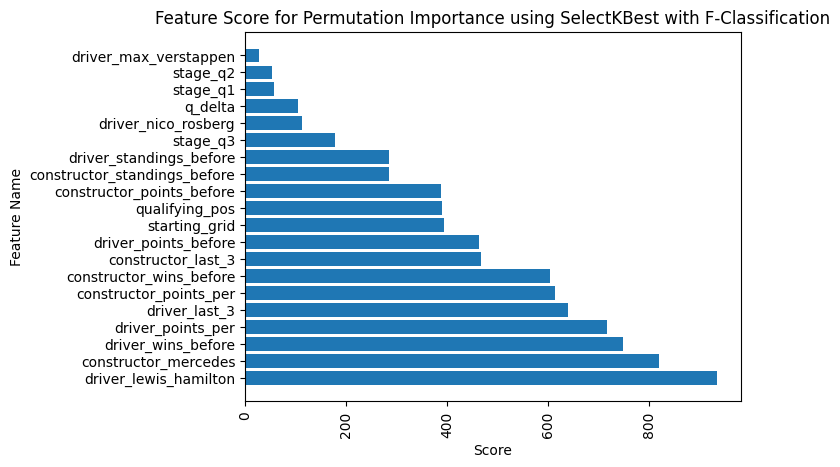

In [13]:
# Plot the scores as a bar chart
k = 20

plt.barh(clf_feature_names[:k], clf_scores[:k])
plt.title('Feature Score for Permutation Importance using SelectKBest with F-Classification')
plt.xlabel('Score')
plt.ylabel('Feature Name')
plt.xticks(rotation=90)
plt.show()

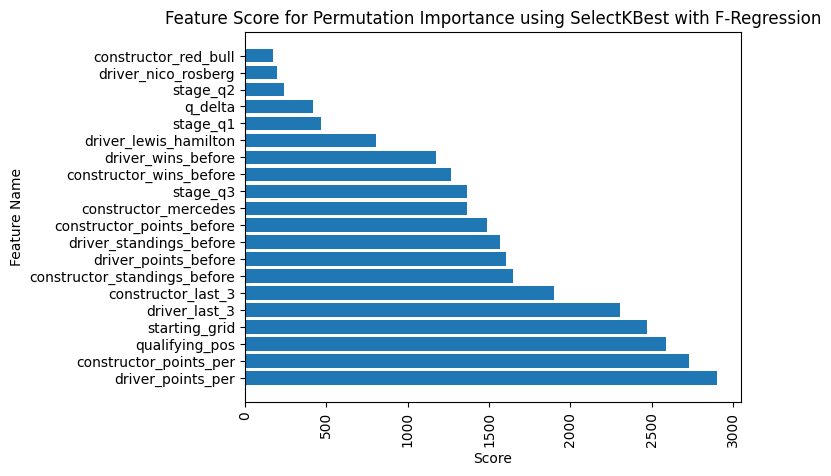

In [14]:
# Plot the scores as a bar chart
k = 20

plt.barh(reg_feature_names[:k], reg_scores[:k])
plt.title('Feature Score for Permutation Importance using SelectKBest with F-Regression')
plt.xlabel('Score')
plt.ylabel('Feature Name')
plt.xticks(rotation=90)
plt.show()

In [21]:
# linear regression feature importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

# define and fit the model
model = LinearRegression()
model.fit(X, y1)

# Calculate the permutation importance of the features
perm = PermutationImportance(model).fit(X, y1)

# Sort the features by importance
imp_df = eli5.explain_weights_df(perm, feature_names=list(X.columns))
imp_df = imp_df.sort_values("weight", ascending=False)

# Print the top k features
imp_df.head()

,feature,weight,std
0,qualifying_pos,0.233692,0.015360
1,starting_grid,0.088656,0.004277
2,driver_lewis_hamilton,0.056205,0.002633
3,stage_q1,0.035328,0.002380
4,constructor_mercedes,0.027378,0.003055


In [22]:
print(imp_df[:30])

                         feature    weight       std
0                 qualifying_pos  0.233692  0.015360
1                  starting_grid  0.088656  0.004277
2          driver_lewis_hamilton  0.056205  0.002633
3                       stage_q1  0.035328  0.002380
4           constructor_mercedes  0.027378  0.003055
5                       stage_q3  0.024400  0.002929
6              driver_points_per  0.022988  0.002680
7            constructor_ferrari  0.015549  0.001637
8          driver_max_verstappen  0.012772  0.001795
9      constructor_points_before  0.010269  0.001584
10          constructor_red_bull  0.008686  0.001465
11           driver_nico_rosberg  0.008305  0.000778
12        constructor_toro_rosso  0.006045  0.000963
13       driver_sebastian_vettel  0.003702  0.000996
14        driver_valtteri_bottas  0.003032  0.000665
15           constructor_renault  0.002498  0.001003
16                      stage_q2  0.002150  0.000279
17            driver_wins_before  0.002085  0.